In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import sklearn
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [ ]:
import torch
device = torch.device("cuda") #set pytorch to be used on GPU

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.6 MB/s eta 0:00:00


In [ ]:
import transformers

In [ ]:
import os
from google.colab import drive

# Mount google drive
DRIVE_MOUNT='/content/gdrive'
drive.mount(DRIVE_MOUNT)


Mounted at /content/gdrive


In [ ]:
x_train = pd.read_csv('/content/gdrive/My Drive/training_data.csv')
x_test = pd.read_csv('/content/gdrive/My Drive/testing_data.csv')
y_train = pd.read_csv('/content/gdrive/My Drive/train_labels.csv')
y_test = pd.read_csv('/content/gdrive/My Drive/test_labels.csv')

In [ ]:
x_train.drop(columns=['Unnamed: 0'], inplace = True)
x_test.drop(columns=['Unnamed: 0'], inplace = True)
y_train.drop(columns=['Unnamed: 0'], inplace = True)
y_test.drop(columns=['Unnamed: 0'], inplace = True)

In [ ]:
fake = pd.read_csv('/content/gdrive/My Drive/fakeForModeling.csv')
true = pd.read_csv('/content/gdrive/My Drive/trueForModeling.csv')

In [ ]:
fake.drop(columns=['Unnamed: 0'], inplace = True)
true.drop(columns=['Unnamed: 0'], inplace = True)

##Binomial Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# 2. instantiate a logistic regression model
lr = LogisticRegression()

lr.fit(x_train, np.ravel(y_train))

LogisticRegression()

In [ ]:
y_pred_lr = lr.predict(x_test)

In [ ]:
print ("Accuracy is: ", metrics.accuracy_score(y_test, y_pred_lr))
print("Mean Squared Error is:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Accuracy is:  0.9057264863681156
Mean Squared Error is: 0.30703992188620094


In [ ]:

lr_cm = metrics.confusion_matrix(y_test, y_pred_lr)
print (lr_cm)

[[4025  417]
 [ 444 4247]]


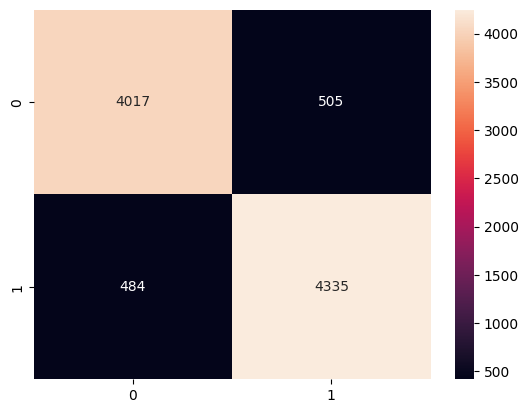

In [ ]:
labels = np.array([['4017','505'],['484','4335']])
sns.heatmap(lr_cm, annot=labels, fmt = '')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4442
           1       0.91      0.91      0.91      4691

    accuracy                           0.91      9133
   macro avg       0.91      0.91      0.91      9133
weighted avg       0.91      0.91      0.91      9133



In [ ]:
 #Calculate predicted probabilities for test data
y_pred_prob_lr = lr.predict_proba(x_test)[:, 1]


In [ ]:
metrics.roc_auc_score(y_test, y_pred_prob_lr)

0.9623075253743001

##Naive Bayes

In [ ]:
from nltk import classify
from nltk import NaiveBayesClassifier
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()# one of the two classic naive Bayes variants used in text classification

%time nb.fit(x_train, np.ravel(y_train))

CPU times: user 49.9 ms, sys: 7.48 ms, total: 57.4 ms
Wall time: 121 ms


MultinomialNB()

In [ ]:
y_pred_class = nb.predict(x_test)

In [ ]:
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_class))
print("Mean Squared Error is:", np.sqrt(mean_squared_error(y_test, y_pred_class)))

Accuracy is: 0.8716741486915581
Mean Squared Error is: 0.3582259779921633


In [ ]:
nb_cm = metrics.confusion_matrix(y_test, y_pred_class)
print(nb_cm)


[[3898  544]
 [ 628 4063]]


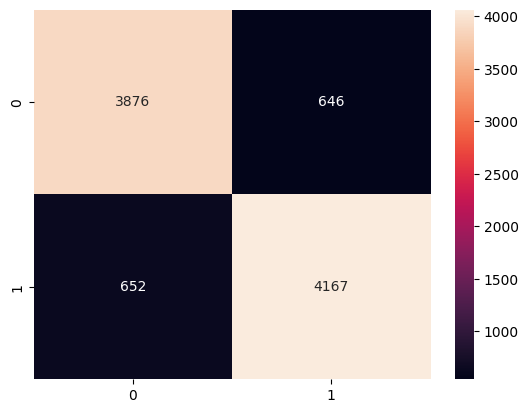

In [ ]:
labels =  np.array([['3876','646'],['652','4167']])
sns.heatmap(nb_cm, annot=labels, fmt = '')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred_class))


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4442
           1       0.88      0.87      0.87      4691

    accuracy                           0.87      9133
   macro avg       0.87      0.87      0.87      9133
weighted avg       0.87      0.87      0.87      9133



In [ ]:
# Calculate predicted probabilities for test data
y_pred_prob_nb = nb.predict_proba(x_test)[:, 1]



In [ ]:
metrics.roc_auc_score(y_test, y_pred_prob_nb)


0.9382583411709952

In [ ]:
#Number of times token appears in each True article
true_token = nb.feature_count_[0, :]

#Number of times token appears in each Fake article
fake_token = nb.feature_count_[1, :]


In [ ]:
tokens = pd.DataFrame({'token':x_train.columns, 'true':true_token, 'fake':fake_token}).set_index('token')
tokens.head()


,true,fake
token,,
according,380.493362,381.549571
act,214.230072,273.822217
action,286.159618,269.747661
added,318.941323,147.026114
administration,498.136629,342.864005


In [ ]:
tokens = pd.DataFrame({'token':x_train.columns, 'true':true_token, 'fake':fake_token}).set_index('token')
tokens.head()


,true,fake
token,,
according,380.493362,381.549571
act,214.230072,273.822217
action,286.159618,269.747661
added,318.941323,147.026114
administration,498.136629,342.864005


In [ ]:
# add 1 to true and fake counts to avoid dividing by 0
tokens['true'] = tokens.true + 1
tokens['fake'] = tokens.fake + 1

In [ ]:
# convert the true and fake counts into frequencies
tokens['true'] = tokens.true / nb.class_count_[0]
tokens['fake'] = tokens.fake / nb.class_count_[1]

In [ ]:
# calculate the ratio of fake to true for each token
tokens['fake/true ratio'] = tokens.fake / tokens.true
tokens.sort_values('fake/true ratio', ascending=False).head(10)

,true,fake,fake/true ratio
token,,,
video,0.005513,0.039579,7.179184
fact,0.004232,0.025917,6.124200
hillary,0.008913,0.049181,5.517834
really,0.004617,0.025409,5.503216
got,0.004327,0.021693,5.013934
know,0.008041,0.039145,4.868430
story,0.005121,0.023579,4.604103
america,0.008304,0.036976,4.452993
thing,0.007483,0.031694,4.235550


In [ ]:
tokens['fake/true ratio'] = tokens.fake / tokens.true
tokens.sort_values('fake/true ratio', ascending=False).head(10)

,true,fake,fake/true ratio
token,,,
video,0.005513,0.039579,7.179184
fact,0.004232,0.025917,6.124200
hillary,0.008913,0.049181,5.517834
really,0.004617,0.025409,5.503216
got,0.004327,0.021693,5.013934
know,0.008041,0.039145,4.868430
story,0.005121,0.023579,4.604103
america,0.008304,0.036976,4.452993
thing,0.007483,0.031694,4.235550


In [ ]:
tokens.sort_values('fake/true ratio', ascending=True).head(10)

,true,fake,fake/true ratio
token,,,
minister,0.050796,0.003966,0.078068
thursday,0.039043,0.008318,0.213052
wednesday,0.039634,0.008620,0.217476
friday,0.037434,0.008788,0.234761
tuesday,0.037395,0.008931,0.238831
monday,0.035086,0.008489,0.241939
foreign,0.035302,0.010101,0.286135
international,0.023909,0.006923,0.289537
military,0.036764,0.011626,0.316242


##Support Vector Machines


In [ ]:
from sklearn.svm import SVC

#Linear kernel fits decently well, decided not to use another kernel because of parsimony
#and because linear has the lowest risk of overfitting
svc = SVC(kernel='linear', random_state=1)
svc.fit(x_train, np.ravel(y_train))


SVC(kernel='linear', random_state=1)

In [ ]:
y_pred_svm = svc.predict(x_test)
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_svm))
print("Mean Squared Error is:", np.sqrt(mean_squared_error(y_test, y_pred_svm)))
print(metrics.classification_report(y_test, y_pred_svm))


Accuracy is: 0.9080258403591372
Mean Squared Error is: 0.30327241819997874
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      4442
           1       0.91      0.91      0.91      4691

    accuracy                           0.91      9133
   macro avg       0.91      0.91      0.91      9133
weighted avg       0.91      0.91      0.91      9133



In [ ]:
svm_cm = metrics.confusion_matrix(y_test, y_pred_svm)
print(svm_cm)

[[4030  412]
 [ 428 4263]]


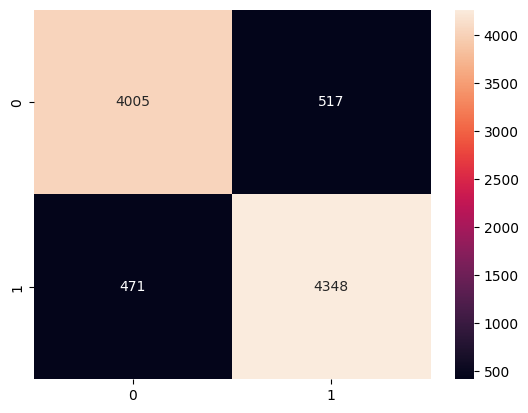

In [ ]:
labels =  np.array([['4005','517'],['471','4348']])
sns.heatmap(svm_cm, annot=labels, fmt = '')
plt.show()

In [ ]:
print (metrics.roc_auc_score(y_test, y_pred_svm))

0.9080052225270477
